<a href="https://colab.research.google.com/github/Suchi0506/HousePricePrediction_ML/blob/main/HousingPricesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.63k/4.63k [00:00<00:00, 7.85MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1


In [ ]:
file_id = '1vjCHZYi9CQUBrkYhRVQYpo6a-RREDu5n'

# Creating the direct download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

df = pd.read_csv(download_url)


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


The purpose of this project is to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc.

**Objective:**

1. Understand the Dataset & cleanup (if required).
2. Build Regression models to predict the sales w.r.t a single & multiple feature.
3. Also evaluate the models & compare their respective scores like R2, RMSE, etc.

In [ ]:
df.shape

(545, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.duplicated().sum()

0

#**VISUALIZATIONS**

We can also generate a correlation matrix, making it easier to spot any highly correlated features.

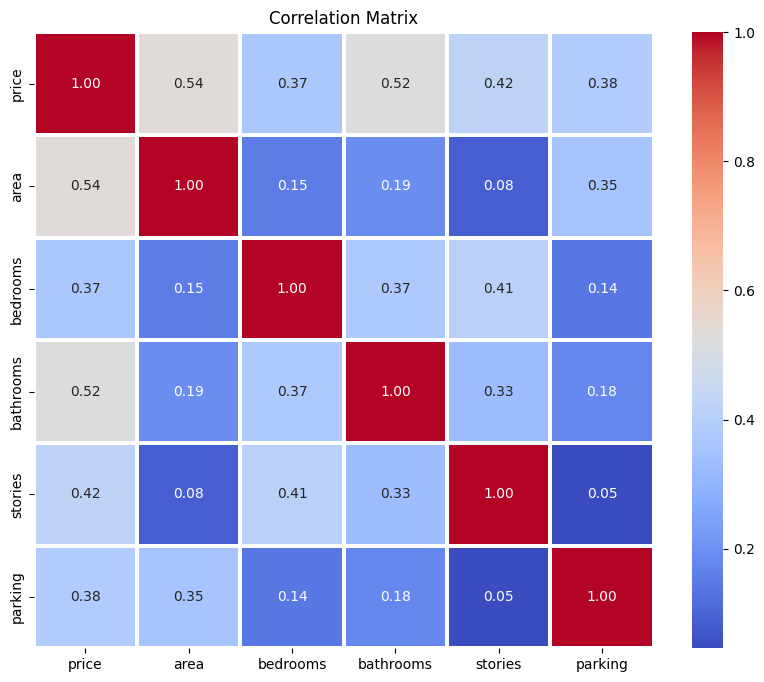

In [ ]:
#generating correlation matrix
df_numeric= df.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1.5)
plt.title('Correlation Matrix')
plt.show()


If two features have a high correlation (e.g., |correlation coefficient| > 0.8), they may be collinear, meaning they provide redundant information.
In this dataset, as the features are not highly correlated to each other, we are not dropping any of the features.

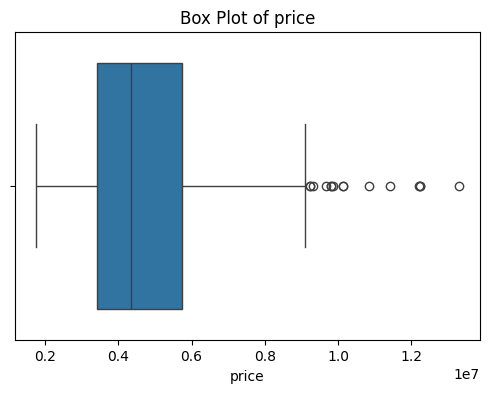

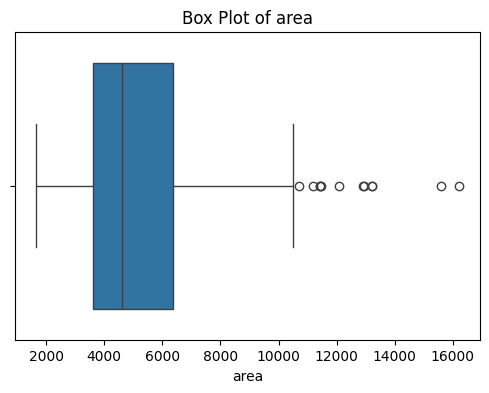

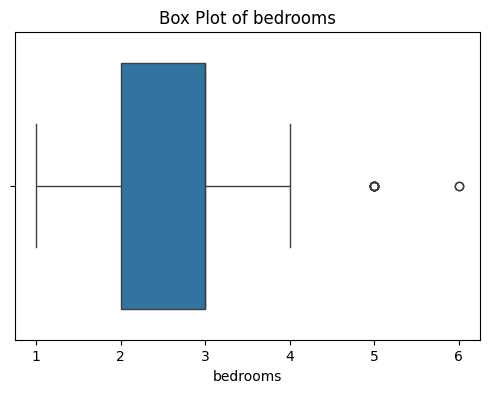

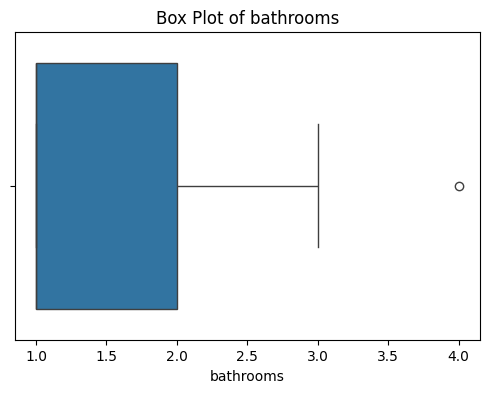

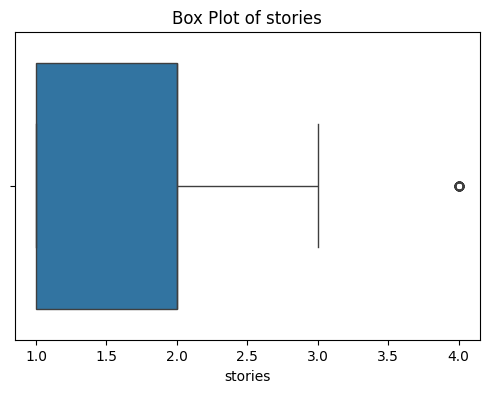

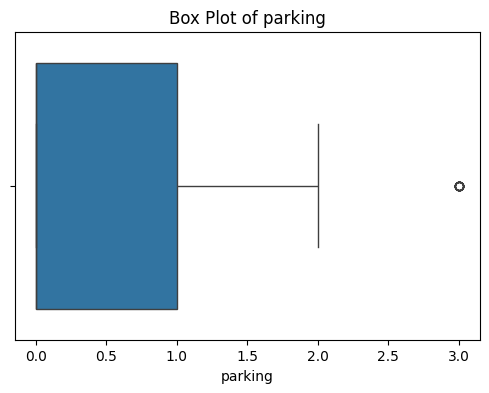

In [ ]:
#Checking for outliers using box plot
numerical_columns= df.select_dtypes(include=['number']).columns
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

There are very few outliers in each of the columns, so no need to remove them.

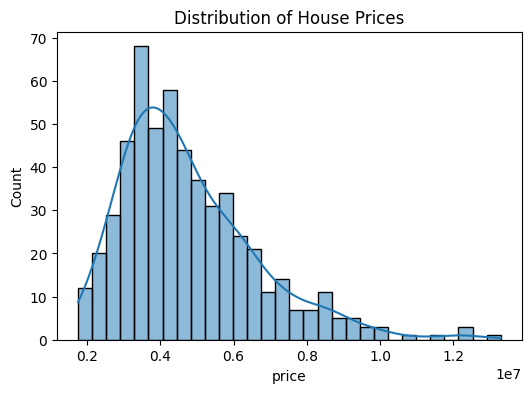

In [ ]:
# Plotting the distribution of the target variable (price)
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.show()


Since the distribution of price column is right-skewed, applying a log transformation is a good idea. A log transformation can help to:

1. Reduce skewness and make the data more normally distributed.
2. Stabilize variance and improve model performance, especially for regression tasks.

In [ ]:
#To apply log transformation:
df['price'] = np.log1p(df['price'])

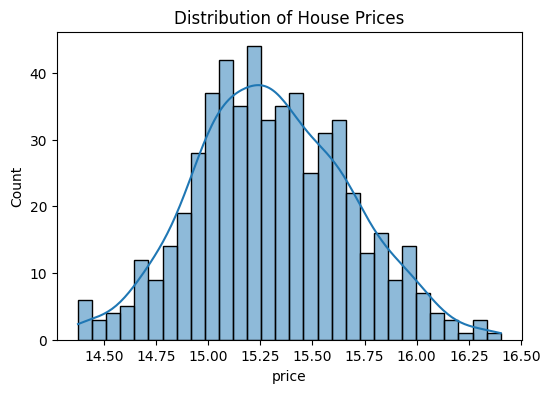

In [ ]:
#Checking the distribution again
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.show()

Text(0.5, 1.0, 'Furnishing Status Distribution')

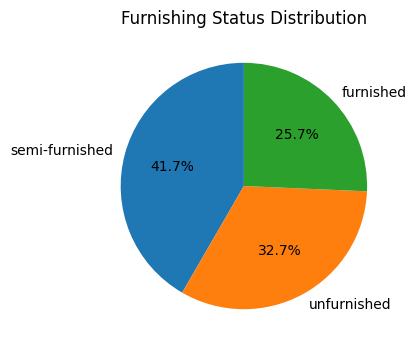

In [ ]:
#Creating a pie chart to see the furnishing status distribution
furnishing_counts = df['furnishingstatus'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(furnishing_counts, labels=furnishing_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Furnishing Status Distribution')

There are more semi furnished houses as compared to furnished and unfurnished houses.

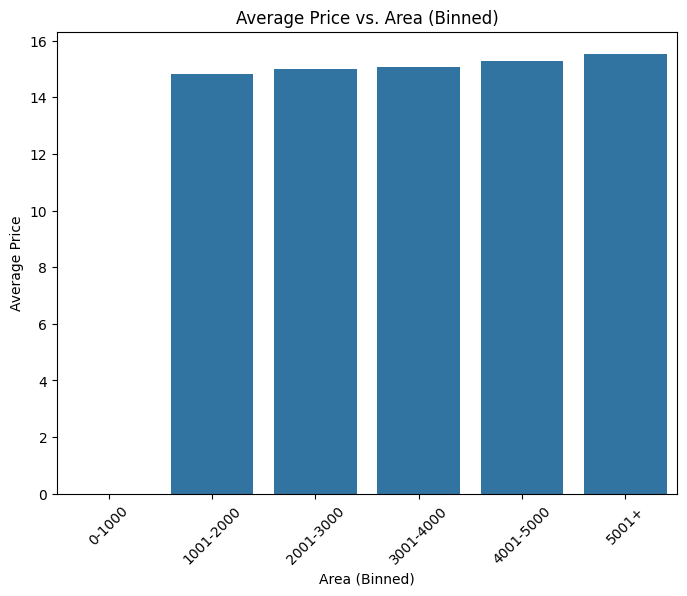

In [ ]:
# Defining bins for 'area'
bins = [0, 1000, 2000, 3000, 4000, 5000, df['area'].max()]
labels = ['0-1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000', '5001+']
df['area_bins'] = pd.cut(df['area'], bins=bins, labels=labels)

# Creating a bar plot with binned 'area'
plt.figure(figsize=(8, 6))
sns.barplot(x='area_bins', y='price', data=df, ci=None, estimator='mean')       #ci=None removes error bars
plt.title('Average Price vs. Area (Binned)')
plt.xlabel('Area (Binned)')
plt.ylabel('Average Price')
plt.xticks(rotation=45)                      # Rotating x-axis labels for better readability
plt.show()


This bar plot suggests that area might not have a strong influence on house prices in this dataset. Other features like mainroad, guestroom, basement, etc., might be stronger determinants of price. But we can't remove it as individually it might not have much impact but together with other features, multicollinearity can be seen. To check, VIF is used which is done in the later part of the code.

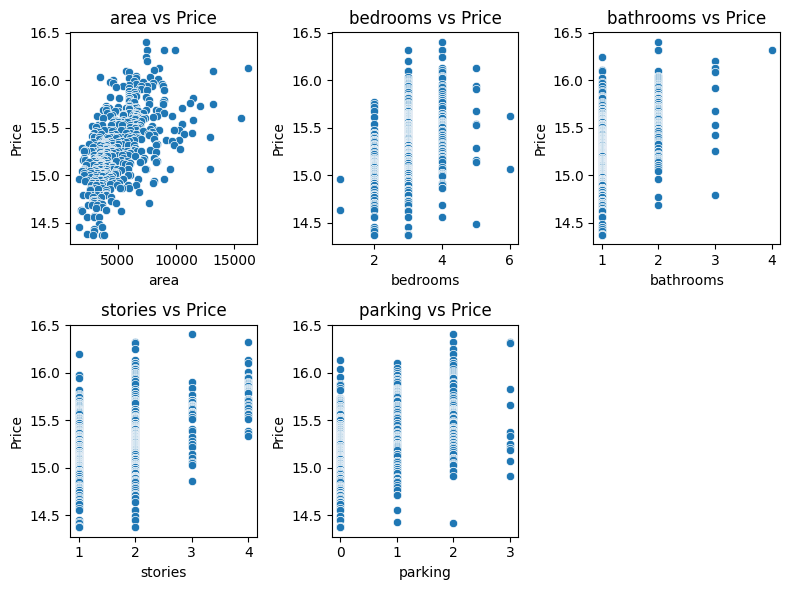

In [ ]:
# Selecting numerical features (excluding the target variable)
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Creating scatter plots
plt.figure(figsize=(8, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()      #prevents overlapping of plot elements
plt.show()

Here are some possible insights and analyses:

**1. Area vs. Price:**
There seems to be a positive relationship between area and price, meaning that larger areas generally result in higher prices. This suggests that area is likely an important predictor for price.

**2. Bedrooms vs. Price:**
The data points are scattered without a strong upward or downward trend, though houses with more bedrooms (4–6) might have slightly higher prices on average.

**3. Bathrooms vs. Price:**
There is a slight upward trend, where houses with more bathrooms tend to have higher prices. However, there is considerable overlap across categories.

**4. Stories vs. Price:**
Houses with 3 or more stories seem to command higher prices on average compared to those with fewer stories. The number of stories could be a good categorical predictor for price.

**5. Parking vs. Price:**
Houses with more parking spaces (2–3) generally have higher prices. However, there is some variability within each category.

**Outliers:**
There are a few extreme values in price, particularly for larger areas or higher features (e.g., bathrooms or stories).

Features like area, bedrooms, and bathrooms might not individually show a strong trend, but their combinations (e.g., large area with more bedrooms) could be significant.

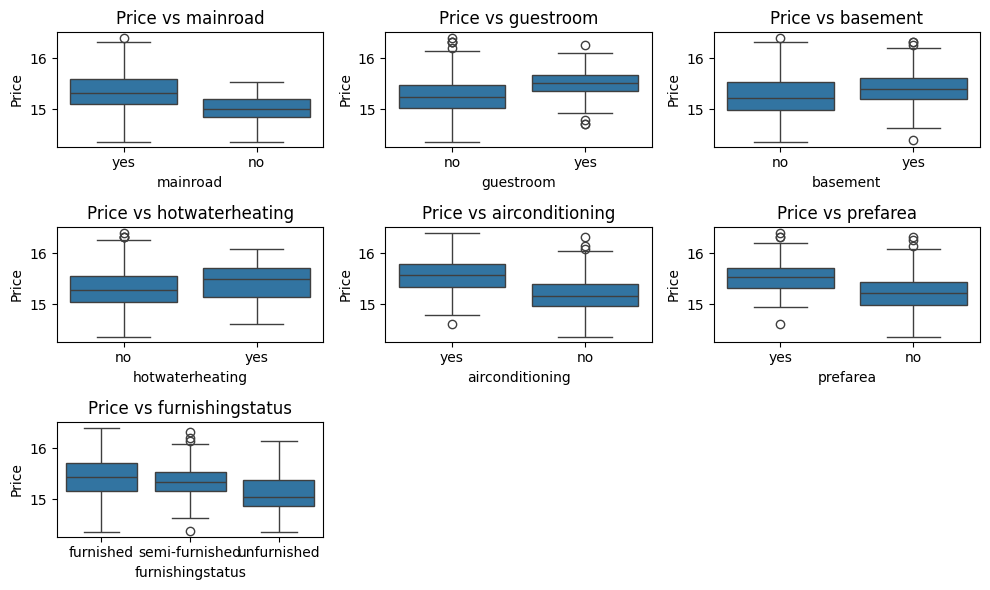

In [ ]:
# Listing of categorical variables
categorical_features = ['mainroad', 'guestroom', 'basement',
                        'hotwaterheating', 'airconditioning',
                        'prefarea', 'furnishingstatus']

# Creating box plots for each categorical feature against price
plt.figure(figsize=(10, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()


###**Observations and Analysis**

**1. Price vs Mainroad:**
Houses located near the main road generally have slightly higher prices compared to those that are not, making these properties mor desirable and expensive.

**2. Price vs Guestroom:**
Houses with a guestroom show a higher price, while those without a guestroom are priced lower. A guestroom adds value to the property as it offers additional space, which is likely appealing to buyers.

**3. Price vs Basement:**
Houses with basements tend to have slightly higher prices compared to those without.

**4. Price vs Hotwater Heating:**
Houses without hot water heating systems seem to have slightly higher prices than those with it.

**5. Price vs Air Conditioning:**
Houses with air conditioning generally have higher prices compared to those without. Air conditioning is often considered a premium feature, especially in regions with warm climates, making such properties more expensive.

**6. Price vs Prefarea:**
Houses in the preferred area have a higher median price compared to those outside the preferred area.

**7. Price vs Furnishing Status**
Fully furnished houses tend to have the highest prices, followed by semi-furnished houses, and unfurnished houses have the lowest prices.
Furnishing adds significant value to a property, reducing the buyer's need for additional investment in furniture and decor, hence increasing the property’s price.

###CHECK FOR MULTICOLLINEARITY

I have already plotted a correlation matrix showing the linear relationships between all pairs of features. If two features have a high correlation (e.g., |correlation coefficient| > 0.8), they may be collinear, meaning they provide redundant information. Pairwise correlations between features close to +1 or -1 indicate potential multicollinearity.

However, there are some limitations of the correlation matrix. A correlation matrix only measures pairwise correlations, but multicollinearity can also occur due to a combination of features.
For example, area might not be strongly correlated with bedrooms or stories individually, but together they might cause multicollinearity.

That's why VIF is a better option to calculate multicollinearity. VIF quantifies how much the variance of a regression coefficient is inflated due to multicollinearity.

In [ ]:
# Encoding categorical features and create dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)       #Converts categorical features in the dataset df into numerical values using one-hot encoding.
                                                       #drop_first= True : Avoids the dummy variable trap by dropping the first category to prevent multicollinearity caused by redundant categories.


In [ ]:
# Converting boolean columns to integer type
#some columns have the bool data type, which might not work with the variance_inflation_factor function since it expects numeric data types
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.select_dtypes('bool').columns})
print(df_encoded)

         price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0    16.403275  7420         4          2        3        2             1   
1    16.321037  8960         4          4        4        3             1   
2    16.321037  9960         3          2        2        2             1   
3    16.318175  7500         4          2        2        3             1   
4    16.250001  7420         4          1        2        2             1   
..         ...   ...       ...        ...      ...      ...           ...   
540  14.414348  3000         2          1        1        2             1   
541  14.384879  2400         3          1        1        0             0   
542  14.375127  3620         2          1        1        0             1   
543  14.375127  2910         3          1        1        0             0   
544  14.375127  3850         3          1        2        0             1   

     guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes 

Before calculating VIF, its important to apply Scaling as features in this dataset have different ranges (e.g., area ranges from 500 to 15000, while bedrooms ranges from 1 to 5).
Algorithms that rely on distances or gradients (e.g., linear regression, logistic regression, k-NN, SVMs) are sensitive to the scale of features.
Without scaling, larger-scale features may dominate the model, leading to biased predictions.


In [ ]:
#Scaling
scaler= StandardScaler()
X_scaled= scaler.fit_transform(df_encoded.drop('price', axis=1))

In [ ]:
# Calculating VIF
X = df_encoded.drop('price', axis=1)  # Dropping the target variable as VIF works only for independent features
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                            Feature        VIF
0                              area   3.434299
1                          bedrooms   1.371339
2                         bathrooms   1.289280
3                           stories   1.508683
4                           parking   1.218083
5                      mainroad_yes   1.231067
6                     guestroom_yes   1.258446
7                      basement_yes   1.334357
8               hotwaterheating_yes   1.047819
9               airconditioning_yes   1.254811
10                     prefarea_yes   1.217934
11  furnishingstatus_semi-furnished   1.604564
12     furnishingstatus_unfurnished   1.698872
13              area_bins_1001-2000   1.441439
14              area_bins_2001-3000   4.583871
15              area_bins_3001-4000  11.259465
16              area_bins_4001-5000  10.009440
17                  area_bins_5001+  33.463772


VIF = 1: No correlation between the predictor variable and other variables

1 < VIF < 5: Moderate correlation

VIF ≥ 5: Indicates potentially problematic multicollinearity

VIF ≥ 10: Indicates serious multicollinearity that may require further investigation

Most features have VIF values below 5, indicating low multicollinearity for those features.

area_bins_3001-4000 (VIF = 11.26), area_bins_4001-5000 (VIF = 10.01), and area_bins_5001+ (VIF = 33.46) exhibit high multicollinearity.


Area is already included in this model, so considering to drop all the area_bins_* variables because they are derived from area and add redundancy.

In [ ]:
# Dropping area_bins_* columns
X = X.drop(columns=[col for col in X.columns if "area_bins_" in col])

In [ ]:
# Recalculating VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                            Feature        VIF
0                              area   8.276447
1                          bedrooms  16.652387
2                         bathrooms   9.417643
3                           stories   7.880730
4                           parking   1.986400
5                      mainroad_yes   6.884806
6                     guestroom_yes   1.473234
7                      basement_yes   2.019858
8               hotwaterheating_yes   1.091568
9               airconditioning_yes   1.767753
10                     prefarea_yes   1.494211
11  furnishingstatus_semi-furnished   2.386831
12     furnishingstatus_unfurnished   2.008632


When previously low-VIF features suddenly show high VIF values after removing other columns, it usually happens because the removed columns were absorbing shared variance or interdependence among remaining features. This indicates a shift in the multicollinearity structure of the dataset.

In [ ]:
#Dropping bedrooms column and recalculating VIF score
X = X.drop(columns=['bedrooms'])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                            Feature       VIF
0                              area  7.721882
1                         bathrooms  8.010130
2                           stories  6.336739
3                           parking  1.984635
4                      mainroad_yes  6.766129
5                     guestroom_yes  1.469309
6                      basement_yes  1.919643
7               hotwaterheating_yes  1.090974
8               airconditioning_yes  1.765240
9                      prefarea_yes  1.493542
10  furnishingstatus_semi-furnished  2.238018
11     furnishingstatus_unfurnished  1.864153


Observing the VIF score, surely multi collinearity has improved, but we can still consider using further feature engineering or dimensionality reduction techniques like PCA(**Principal Component Analysis**) to get the VIF score of all the features within the  permissible limits.

In [ ]:
from sklearn.decomposition import PCA

# Standardization already been done
pca= PCA(n_components=0.95)
X_pca= pca.fit_transform(X_scaled)


In [ ]:
#Applying PCA with n_components=0.95
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

#Checking the shape of the reduced data
print(f"Original Features: {X.shape[1]}")
print(f"Reduced Features After PCA: {X_pca.shape[1]}")


Original Features: 12
Reduced Features After PCA: 15


The reduced features after applying PCA is more that original features which could be due to various reasons:

1. Original features including the categorical variables that were one-hot encoded into multiple binary columns, PCA created new combinations, increasing the number of features.
For example, a single feature with 5 categories would generate 4 binary columns (n-1 rule for one-hot encoding). PCA will treat all these columns as separate dimensions.

2. When using n_components=0.95, PCA determines the number of components required to retain 95% of the explained variance.
If the variance in the dataset is spread out across many dimensions, PCA may end up requiring more components than the original features to achieve the specified variance threshold.

To rectify this, there are methods like looking up the explained variance ratio and then calculating the cumulative variance to determine how many components are necessary to retain 95% of the total variance.

Also, we can manually set n_components to a number smaller than the original features as dimensionality reduction is our primary goal.

In [ ]:
#Reducing to 10 components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
print(f"Original Features: {X.shape[1]}")
print(f"Reduced Features After PCA: {X_pca.shape[1]}")

Original Features: 12
Reduced Features After PCA: 10


In [ ]:
#Recalculating VIF with reduced components
vif_data = pd.DataFrame()
vif_data["Feature"] = [f'PC{i+1}' for i in range(X_pca.shape[1])]
vif_data["VIF"] = [variance_inflation_factor(X_pca, i) for i in range(X_pca.shape[1])]

print("VIF Scores After PCA:")
print(vif_data)


VIF Scores After PCA:
  Feature  VIF
0     PC1  1.0
1     PC2  1.0
2     PC3  1.0
3     PC4  1.0
4     PC5  1.0
5     PC6  1.0
6     PC7  1.0
7     PC8  1.0
8     PC9  1.0
9    PC10  1.0


Now VIF scores look good after applying PCA. Now we can proceed to apply machine learning algorithms

#**MACHINE LEARNING MODELS**

After applying Principal Component Analysis (PCA), we will train and test the model using the transformed dataset i.e., the dataset that has gone through the PCA transformation which is clean and preprocessed.

The following models are covered in this:

1. Linear Regression
2. Decision Tree Regressor
3. Support Vector Regressor (SVR)
4. K-Nearest Neighbors (KNN) Regressor
5. Random Forest Regressor
6. Gradient Boosting Regressor

Also each model are evaluated using R² and RMSE metrics.

In [ ]:
X_pca

array([[ 3.36904563, -0.07379767,  1.64869357, ..., -0.14221348,
         0.60454522,  1.27918839],
       [ 4.64199977,  1.36325635,  3.34281887, ..., -0.63527885,
        -1.07532895,  1.62557113],
       [ 3.15162205,  0.20820442, -1.25629487, ..., -0.49075093,
         0.07332705,  1.20948922],
       ...,
       [-2.5897549 , -1.80713412, -0.40546214, ...,  0.09328867,
         0.38699033, -0.31416676],
       [-2.61553238,  0.29978027,  1.27618704, ..., -0.98276932,
        -1.52575979,  0.01072962],
       [-2.01205825, -1.17520966,  0.65196709, ...,  0.1330174 ,
         0.72243148, -0.39648385]])

In [ ]:
y= df['price']
y

,price
0,16.403275
1,16.321037
2,16.321037
3,16.318175
4,16.250001
...,...
540,14.414348
541,14.384879
542,14.375127
543,14.375127


In [ ]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (436, 10)
Testing Features Shape: (109, 10)
Training Target Shape: (436,)
Testing Target Shape: (109,)


In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calculating R² and RMSE
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return mse, mae, r2, rmse


####**LINEAR REGRESSION**

In [ ]:
lr_model= LinearRegression()
lr_r2, lr_rmse, lr_mse, lr_mae= evaluate_model(lr_model, X_train, X_test, y_train, y_test)

In [ ]:
print(f"Linear Regression R²: {lr_r2:.4f}, RMSE: {lr_rmse:.4f}, MSE: {lr_mse:.4f}, MAE: {lr_mae:.4f}")

Linear Regression R²: 0.0622, RMSE: 0.2009, MSE: 0.6777, MAE: 0.2495


####**DECISION TREE**

In [ ]:
dt= DecisionTreeRegressor(random_state=42)
dt_r2, dt_rmse, dt_mse, dt_mae= evaluate_model(dt, X_train, X_test, y_train, y_test)

print(f"Decision Tree Regression: R²: {dt_r2:.4f}, RMSE: {dt_rmse:.4f}, MSE: {lr_mse:.4f}, MAE: {lr_mae:.4f}")


Decision Tree Regression: R²: 0.1160, RMSE: 0.2668, MSE: 0.6777, MAE: 0.2495


####**SUPPORT VECTOR REGRESSOR**

In [ ]:
svr= SVR()
svr_r2, svr_rmse, svr_mse, svr_mae = evaluate_model(svr, X_train, X_test, y_train, y_test)

print(f"Support Vector Regression: R²: {svr_r2:.4f}, RMSE: {svr_rmse:.4f}, MSE: {svr_mse:.4f}, MAE: {svr_mae:.4f}")

Support Vector Regression: R²: 0.0709, RMSE: 0.2141, MSE: 0.6326, MAE: 0.2664


####**K- NEAREST NEIGHBOURS (KNN) REGRESSOR**

In [ ]:
knn= KNeighborsRegressor()
knn_r2, knn_rmse, knn_mse, knn_mae = evaluate_model(knn, X_train, X_test, y_train, y_test)

print(f"K-Nearest Neighbors Regression: R²: {knn_r2:.4f}, RMSE: {knn_rmse:.4f}, MSE: {knn_mse:.4f}, MAE: {knn_mae:.4f}")


K-Nearest Neighbors Regression: R²: 0.0716, RMSE: 0.2135, MSE: 0.6290, MAE: 0.2676


####**RANDOM FOREST REGRESSOR**

In [ ]:
#random forest regressor
rf= RandomForestRegressor(random_state=42)
rf_r2, rf_rmse, rf_mse, rf_mae = evaluate_model(rf, X_train, X_test, y_train, y_test)

print(f"Random Forest Regression: R²: {rf_r2:.4f}, RMSE: {rf_rmse:.4f}, MSE: {rf_mse:.4f}, MAE: {rf_mae:.4f}")

Random Forest Regression: R²: 0.0716, RMSE: 0.2128, MSE: 0.6293, MAE: 0.2675


####**GRADIENT BOOSTING REGRESSOR**

In [ ]:
gbr= GradientBoostingRegressor(random_state=42)
gbr_r2, gbr_rmse, gbr_mse, gbr_mae = evaluate_model(gbr, X_train, X_test, y_train, y_test)

print(f"Gradient Boosting Regression: R²: {gbr_r2:.4f}, RMSE: {gbr_rmse:.4f}, MSE: {gbr_mse:.4f}, MAE: {gbr_mae:.4f}")

Gradient Boosting Regression: R²: 0.0648, RMSE: 0.1996, MSE: 0.6645, MAE: 0.2545


####**COMPARING THE RESULTS**

In [ ]:
#comparing results
model_performance= pd.DataFrame({
                               'models': ['Linear Regression', 'Decision Tree', 'Support Vector', 'K-Nearest Neighbors', 'Random Forest', 'Gradient Boosting'],
                               'R²': [lr_r2, dt_r2, svr_r2, knn_r2, rf_r2, gbr_r2],
                               'RMSE': [lr_rmse, dt_rmse, svr_rmse, knn_rmse, rf_rmse, gbr_rmse],
                               'MSE': [lr_mse, dt_mse, svr_mse, knn_mse, rf_mse, gbr_mse],
                               'MAE': [lr_mae, dt_mae, svr_mae, knn_mae, rf_mae, gbr_mae]
                               })

print(model_performance)

                models        R²      RMSE       MSE       MAE
0    Linear Regression  0.062241  0.200947  0.677657  0.249481
1        Decision Tree  0.115995  0.266848  0.399268  0.340580
2       Support Vector  0.070948  0.214144  0.632565  0.266360
3  K-Nearest Neighbors  0.071630  0.213481  0.629033  0.267637
4        Random Forest  0.071573  0.212836  0.629327  0.267531
5    Gradient Boosting  0.064778  0.199607  0.664516  0.254516


####**METRICS**

1. **R²** (Coefficient of Determination): Measures how well the independent variables explain the variance in the dependent variable. A higher value (closer to 1) indicates a better fit.

2. **RMSE** (Root Mean Squared Error): Measures the model's prediction error. A lower value indicates better performance.

3. **MSE**(Mean Squared error): Measures the average of the squared differences between the actual and predicted values. A lower MSE indicates a better model.

4. **MAE**(Mean Absolute error): Measures the average of the absolute differences between the actual and predicted values. A lower MAE indicates a better model.


####**ANALYSIS**
1. **Linear Regression** has the lowest RMSE value, inferring lowest errors among all the models. Also it explains 67% of the variance in the target variable. MSE is in consistent with RMSE but has the highest average error, suggesting overfitting.

2. **Decision Tree** has the highest errors in comparison to other models and explains only 39.9% of the variance. It performs poorly on this dataset.

3. **SVM, Random Forest** performs almost similarly and provides a balance of interpretability and performance but doesn’t outperform simpler models like Linear Regression. SVM has relatively low error as compared to other models.

4. **KNN** also gives very similar result as SVM, Random forest but it could have given better results by doing hyperparameters tuning (i.e. number of neighbors).

5. **Gradient Boosting** performs similarly as Linear Regression but its mostly uses for ensemble models.

####**VISUALIZING MODEL PERFORMANCE**

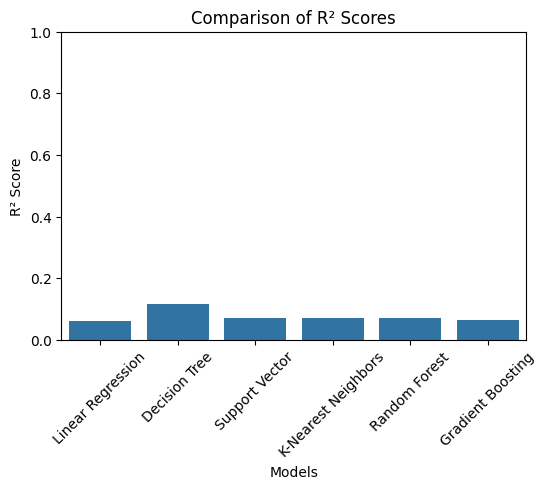

In [ ]:
# R2 comparison
plt.figure(figsize=(6, 4))
sns.barplot(x='models', y='R²', data=model_performance)
plt.title('Comparison of R² Scores')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

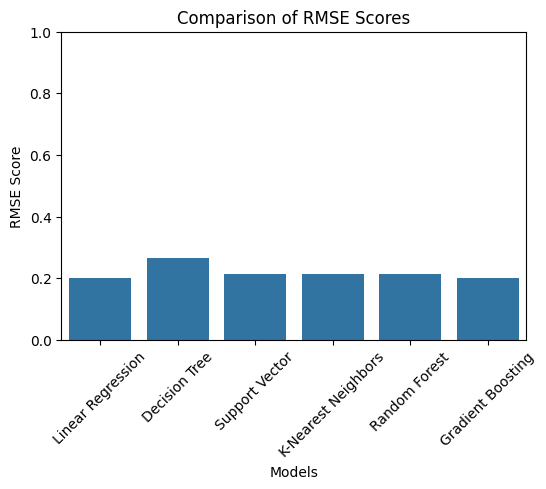

In [ ]:
#RMSE comparison
plt.figure(figsize=(6, 4))
sns.barplot(x='models', y='RMSE', data=model_performance)
plt.title('Comparison of RMSE Scores')
plt.xlabel('Models')
plt.ylabel('RMSE Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

###**CHECK FOR OVERFITTING AND REGULARIZATION**

In [ ]:
#Training the model
model = LinearRegression()
model.fit(X_train, y_train)

#Making predictions on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# R-squared (R²)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


In [ ]:
#Printing the results
print("Training Data Performance:")
print(f"MSE (Train): {mse_train:.4f}")
print(f"RMSE (Train): {rmse_train:.4f}")
print(f"MAE (Train): {mae_train:.4f}")
print(f"R² (Train): {r2_train:.4f}")

print("\nTest Data Performance:")
print(f"MSE (Test): {mse_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"R² (Test): {r2_test:.4f}")

#Checking for overfitting
if mse_train < mse_test:
    print("\nThe model is overfitting: it performs better on the training data than on the test data.")
else:
    print("\nThe model is not overfitting: performance is similar on both training and test data.")

Training Data Performance:
MSE (Train): 0.0391
RMSE (Train): 0.1977
MAE (Train): 0.1538
R² (Train): 0.6858

Test Data Performance:
MSE (Test): 0.0622
RMSE (Test): 0.2495
MAE (Test): 0.2009
R² (Test): 0.6777

The model is overfitting: it performs better on the training data than on the test data.


###**REGULARIZATION**

Both Ridge and Lasso regression add a regularization term to the loss function, which helps reduce overfitting by penalizing large coefficients.

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

def train_and_evaluate(model, model_name):

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics for training set
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)

    # Metrics for test set
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Printing results
    print(f"\n{model_name} Results:")
    print("Training Metrics:")
    print(f"R²: {train_r2:.4f}, MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}")
    print("Test Metrics:")
    print(f"R²: {test_r2:.4f}, MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}")

# Ridge Regression
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
train_and_evaluate(ridge, "Ridge Regression")

# Lasso Regression
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength
train_and_evaluate(lasso, "Lasso Regression")



Ridge Regression Results:
Training Metrics:
R²: 0.6858, MSE: 0.0391, RMSE: 0.1977, MAE: 0.1538
Test Metrics:
R²: 0.6775, MSE: 0.0623, RMSE: 0.2495, MAE: 0.2010

Lasso Regression Results:
Training Metrics:
R²: 0.6052, MSE: 0.0491, RMSE: 0.2216, MAE: 0.1707
Test Metrics:
R²: 0.5536, MSE: 0.0862, RMSE: 0.2936, MAE: 0.2348


Ridge has better R² and lower errors (MSE, RMSE, MAE) for both training and test datasets.
This suggests Ridge regularization handles the dataset better without underfitting or overfitting.

Lasso's lower R² and higher errors indicate that its L1 regularization might be too strong, shrinking coefficients more aggressively and possibly underfitting the data.

##**CONCLUSIONS:**

1. PCA effectively reduced multicollinearity by creating principal components, though it slightly increased the number of features from 13 to 15. This was due to the explained variance threshold (n_components=0.95), capturing 95% variance.

2. Removing highly collinear features (e.g., "bathrooms") improved multicollinearity metrics.

3. Ridge Regression outperformed other models with the highest R² values (0.68 on training, 0.67 on testing), showing a good balance between training and testing performance. Lasso Regression had slightly lower R² values, indicating it might be underfitting compared to Ridge.

4. Ridge had lower error metrics on both training and testing, making it the most reliable model for your dataset.
Lasso had higher RMSE and MAE, suggesting it was less accurate at predicting house prices.

5. Random Forest, Decision Tree, and KNN had lower R² scores, indicating they might not be the best choice for this dataset. These models may not have captured the underlying patterns as effectively.

6. Model Selection
Ridge Regression is the best-performing model based on this dataset, balancing high R² scores and low error metrics.
Linear Regression was close in performance but lacked regularization, making it more prone to overfitting.